In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('movies.csv')

In [3]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,The Mechanic,R,Action,2011,"January 28, 2011 (United States)",6.6,154000.0,Simon West,Richard Wenk,Jason Statham,United States,40000000.0,76130093.0,CBS Films,93.0
5939,Ghost Rider: Spirit of Vengeance,PG-13,Action,2011,"February 17, 2012 (United States)",4.3,113000.0,Mark Neveldine,Scott M. Gimple,Nicolas Cage,United States,57000000.0,132563930.0,Columbia Pictures,96.0
5940,Battle Los Angeles,PG-13,Action,2011,"March 11, 2011 (United States)",5.7,176000.0,Jonathan Liebesman,Christopher Bertolini,Aaron Eckhart,United States,70000000.0,211819354.0,Columbia Pictures,116.0
5941,The Green Hornet,PG-13,Action,2011,"January 14, 2011 (United States)",5.8,157000.0,Michel Gondry,Seth Rogen,Seth Rogen,United States,120000000.0,227817248.0,Columbia Pictures,119.0


In [4]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 29%
gross - 3%
company - 0%
runtime - 0%


In [5]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<AxesSubplot:>

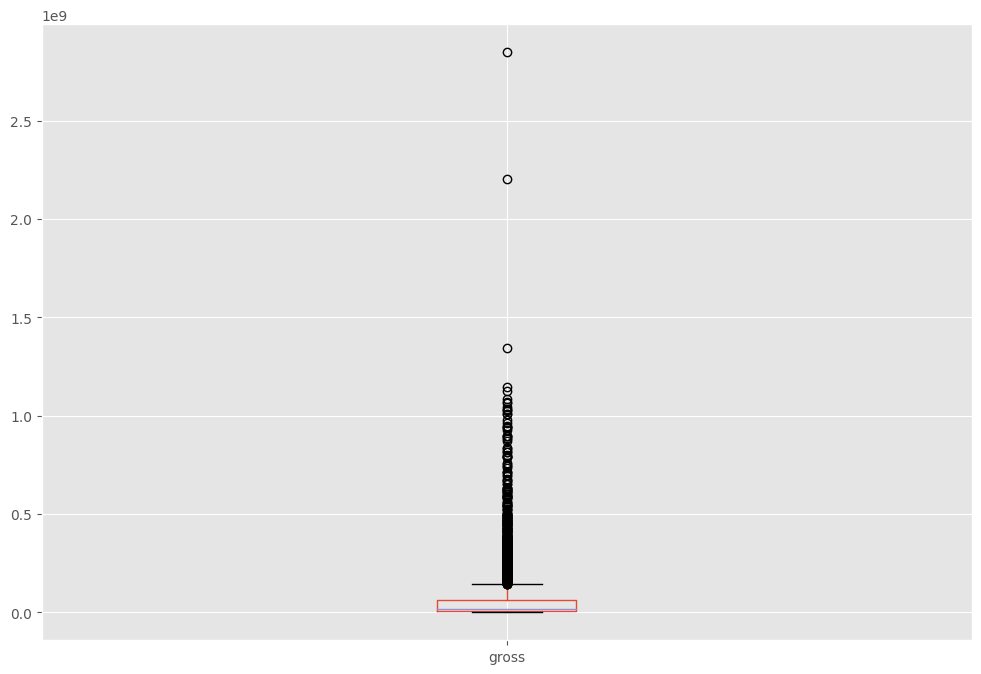

In [6]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [7]:
# Drop the Dulicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,The Mechanic,R,Action,2011,"January 28, 2011 (United States)",6.6,154000.0,Simon West,Richard Wenk,Jason Statham,United States,40000000.0,76130093.0,CBS Films,93.0
5939,Ghost Rider: Spirit of Vengeance,PG-13,Action,2011,"February 17, 2012 (United States)",4.3,113000.0,Mark Neveldine,Scott M. Gimple,Nicolas Cage,United States,57000000.0,132563930.0,Columbia Pictures,96.0
5940,Battle Los Angeles,PG-13,Action,2011,"March 11, 2011 (United States)",5.7,176000.0,Jonathan Liebesman,Christopher Bertolini,Aaron Eckhart,United States,70000000.0,211819354.0,Columbia Pictures,116.0
5941,The Green Hornet,PG-13,Action,2011,"January 14, 2011 (United States)",5.8,157000.0,Michel Gondry,Seth Rogen,Seth Rogen,United States,120000000.0,227817248.0,Columbia Pictures,119.0


In [8]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
5845,Harry Potter and the Deathly Hallows: Part 2,PG-13,Adventure,2011,"July 15, 2011 (United States)",8.1,790000.0,David Yates,Steve Kloves,Daniel Radcliffe,United Kingdom,125000000.0,1.342322e+09,Warner Bros.,130.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0
5878,Transformers: Dark of the Moon,PG-13,Action,2011,"June 29, 2011 (United States)",6.2,390000.0,Michael Bay,Ehren Kruger,Shia LaBeouf,United States,195000000.0,1.123794e+09,Paramount Pictures,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,Drama,2006,"May 24, 2007 (Germany)",6.3,12000.0,Katherine Brooks,Katherine Brooks,Erin Kelly,United States,1000000.0,NaN,Big Easy Pictures,77.0
5287,Felon,R,Thriller,2008,"July 18, 2008 (Canada)",7.4,76000.0,Ric Roman Waugh,Ric Roman Waugh,Stephen Dorff,United States,2900000.0,NaN,Stage 6 Films,104.0
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='gross', ylabel='budget'>

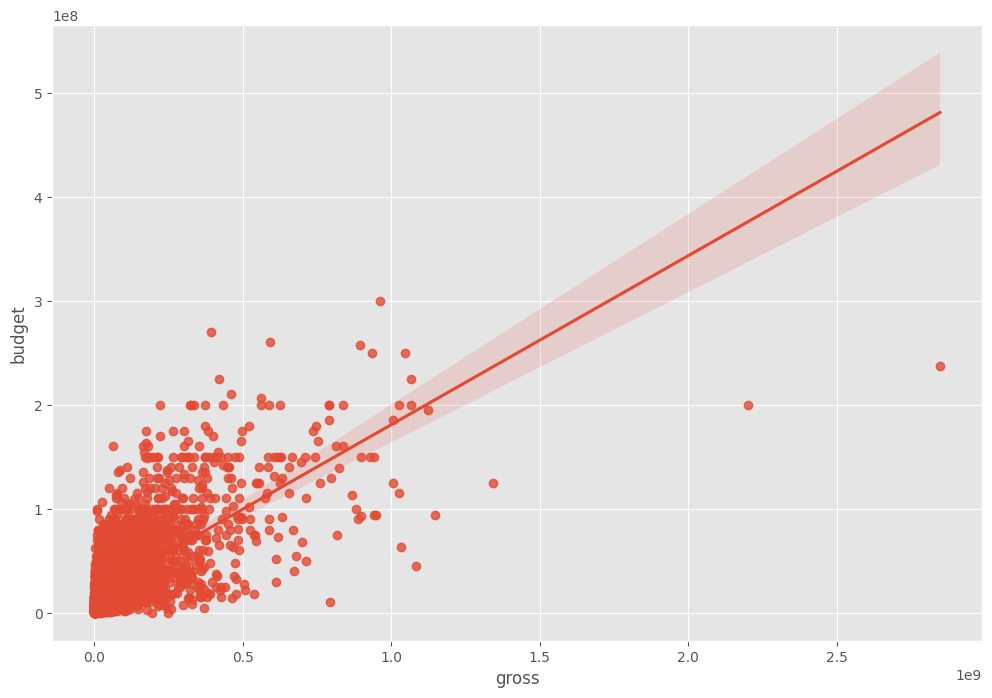

In [9]:
sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

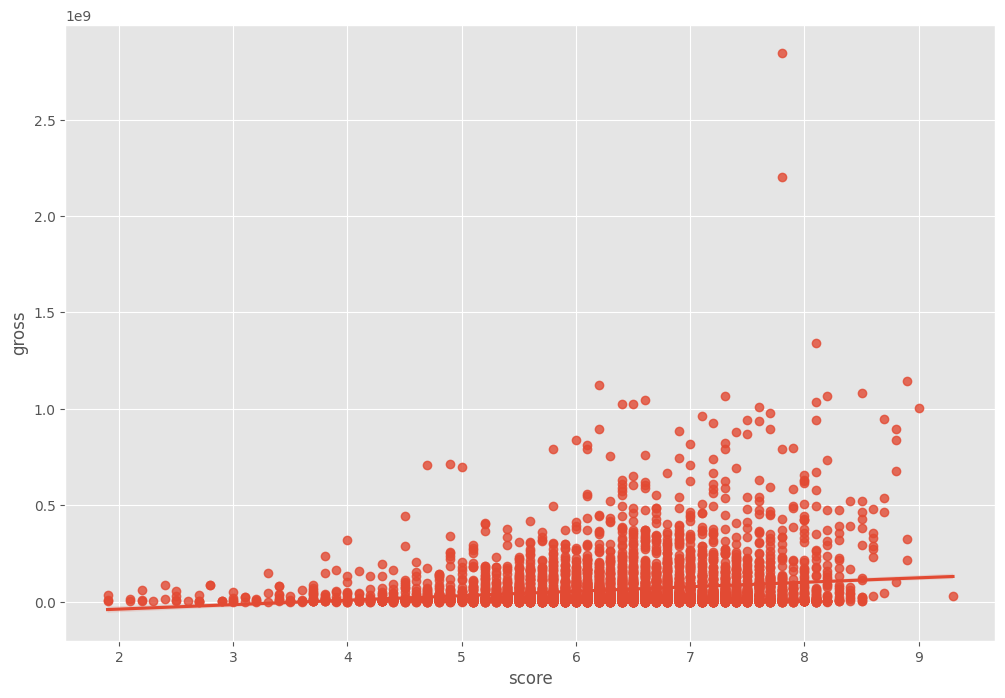

In [10]:
sns.regplot(x="score", y="gross", data=df)


In [11]:
# Correlation Matrix between all numeric columns
# We will use different method of correlation
df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.084589,0.260473,0.376762,0.261487,0.089183
score,0.084589,1.000000,0.400588,0.033539,0.178154,0.396637
votes,0.260473,0.400588,1.000000,0.401472,0.646680,0.280809
budget,0.376762,0.033539,0.401472,1.000000,0.682735,0.291672
gross,0.261487,0.178154,0.646680,0.682735,1.000000,0.231477
runtime,0.089183,0.396637,0.280809,0.291672,0.231477,1.000000


In [12]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.063631,0.385778,0.275795,0.225797,0.068987
score,0.063631,1.000000,0.301979,-0.020228,0.076343,0.281785
votes,0.385778,0.301979,1.000000,0.346118,0.550695,0.185234
budget,0.275795,-0.020228,0.346118,1.000000,0.491708,0.221083
gross,0.225797,0.076343,0.550695,0.491708,1.000000,0.159338
runtime,0.068987,0.281785,0.185234,0.221083,0.159338,1.000000


In [13]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092186,0.541991,0.393372,0.336135,0.101063
score,0.092186,1.000000,0.431122,-0.029928,0.111100,0.397048
votes,0.541991,0.431122,1.000000,0.493784,0.743285,0.271612
budget,0.393372,-0.029928,0.493784,1.000000,0.672220,0.316199
gross,0.336135,0.111100,0.743285,0.672220,1.000000,0.232144
runtime,0.101063,0.397048,0.271612,0.316199,0.232144,1.000000


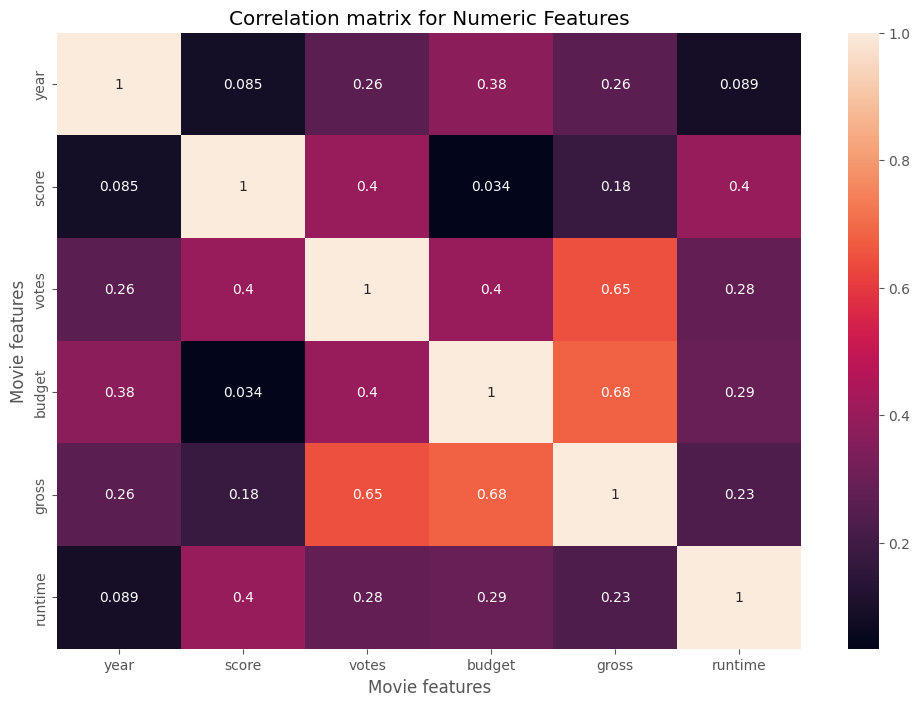

In [14]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [15]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.178743,0.031588,0.974666,0.969094,-0.032190,0.322273,0.706979,0.789730,0.699665,0.121508,0.352194,0.958707,0.495897,0.050253
rating,0.178743,1.000000,-0.078227,0.190396,0.183182,0.016007,0.098737,0.105888,0.128713,0.106106,-0.012207,0.185236,0.185349,-0.029781,0.024100
genre,0.031588,-0.078227,1.000000,0.033335,0.032460,-0.003357,0.026415,0.036919,0.027593,0.040857,-0.026630,0.063291,0.032897,0.016070,0.015375
year,0.974666,0.190396,0.033335,1.000000,0.993354,-0.032253,0.343915,0.723114,0.803427,0.715200,0.121537,0.366178,0.982870,0.500311,0.053493
released,0.969094,0.183182,0.032460,0.993354,1.000000,-0.034166,0.334435,0.724592,0.798708,0.714131,0.131061,0.354543,0.980965,0.508124,0.051499
score,-0.032190,0.016007,-0.003357,-0.032253,-0.034166,1.000000,-0.004804,-0.007515,-0.025786,0.006710,0.016757,-0.007976,-0.031593,-0.012996,0.021896
votes,0.322273,0.098737,0.026415,0.343915,0.334435,-0.004804,1.000000,0.192188,0.250238,0.180776,-0.024531,0.382922,0.323724,0.000260,0.081495
director,0.706979,0.105888,0.036919,0.723114,0.724592,-0.007515,0.192188,1.000000,0.693822,0.637236,0.134423,0.125412,0.706744,0.466407,-0.016222
writer,0.789730,0.128713,0.027593,0.803427,0.798708,-0.025786,0.250238,0.693822,1.000000,0.622698,0.140494,0.243713,0.790131,0.453309,0.044019
star,0.699665,0.106106,0.040857,0.715200,0.714131,0.006710,0.180776,0.637236,0.622698,1.000000,0.168434,0.106254,0.698734,0.459712,0.030524


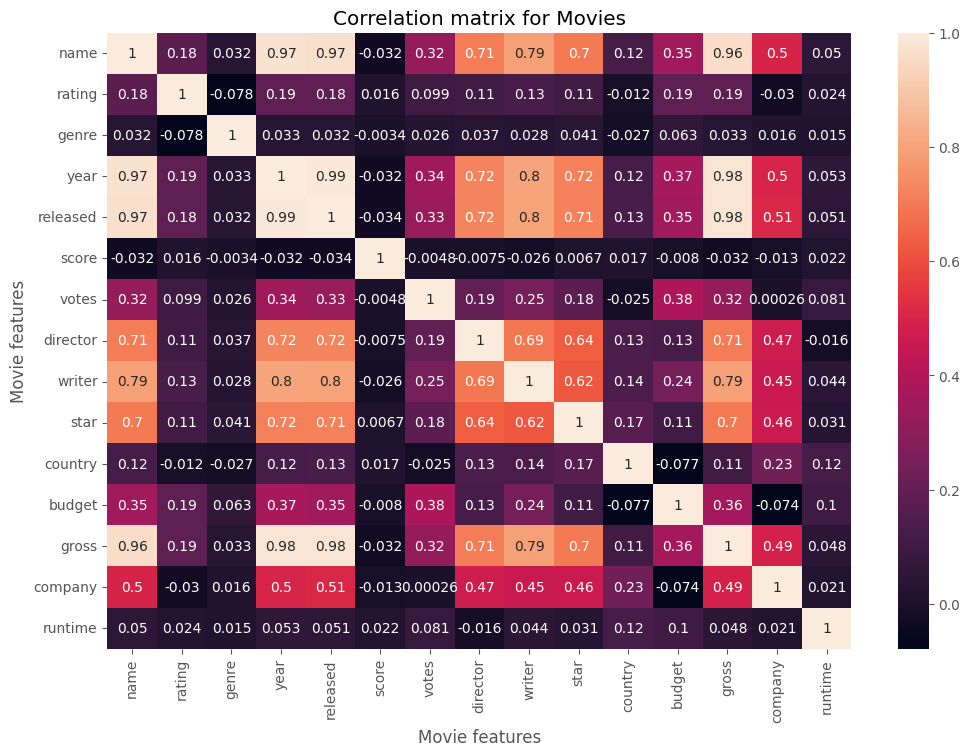

In [16]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [17]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.178743
         genre       0.031588
         year        0.974666
         released    0.969094
                       ...   
runtime  country     0.122060
         budget      0.100714
         gross       0.047851
         company     0.020657
         runtime     1.000000
Length: 225, dtype: float64


In [18]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

rating   genre     -0.078227
genre    rating    -0.078227
budget   country   -0.077268
country  budget    -0.077268
company  budget    -0.074142
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [19]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

year      company     0.500311
company   year        0.500311
          released    0.508124
released  company     0.508124
writer    star        0.622698
                        ...   
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
Length: 61, dtype: float64


In [20]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 39122748727
Universal Pictures           33816611893
Paramount Pictures           28379067746
Columbia Pictures            28275659109
Twentieth Century Fox        27401922120
Walt Disney Pictures         20326373199
New Line Cinema              13421020443
Touchstone Pictures          11601864968
Dreamworks Pictures          10037064208
DreamWorks Animation          6307635530
Metro-Goldwyn-Mayer (MGM)     4559861854
Fox 2000 Pictures             4482988875
TriStar Pictures              4463445443
Pixar Animation Studios       4209392645
Miramax                       3743121625
Name: gross, dtype: int64

In [21]:
df['Year'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,The Mechanic,R,Action,2011,"January 28, 2011 (United States)",6.6,154000.0,Simon West,Richard Wenk,Jason Statham,United States,40000000.0,76130093.0,CBS Films,93.0,Janu
5939,Ghost Rider: Spirit of Vengeance,PG-13,Action,2011,"February 17, 2012 (United States)",4.3,113000.0,Mark Neveldine,Scott M. Gimple,Nicolas Cage,United States,57000000.0,132563930.0,Columbia Pictures,96.0,Febr
5940,Battle Los Angeles,PG-13,Action,2011,"March 11, 2011 (United States)",5.7,176000.0,Jonathan Liebesman,Christopher Bertolini,Aaron Eckhart,United States,70000000.0,211819354.0,Columbia Pictures,116.0,Marc
5941,The Green Hornet,PG-13,Action,2011,"January 14, 2011 (United States)",5.8,157000.0,Michel Gondry,Seth Rogen,Seth Rogen,United States,120000000.0,227817248.0,Columbia Pictures,119.0,Janu


In [22]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
120 Films,2002,6479328.0
...,...,...
Zucker Brothers Productions,1998,7027290.0
Zupnik-Curtis Enterprises,1984,12145169.0
double A Films,2000,2046433.0


In [23]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Twentieth Century Fox  2009    3793491246
Paramount Pictures     2011    3542766155
Warner Bros.           2010    3300479986
Walt Disney Pictures   2010    3104474158
Columbia Pictures      2006    2934631933
Warner Bros.           2011    2919093929
                       2005    2688767210
                       2004    2662920386
Columbia Pictures      2009    2619267896
Twentieth Century Fox  1997    2583690336
Walt Disney Pictures   2007    2532333205
Warner Bros.           2008    2525654143
                       2009    2522833930
                       2007    2466806991
                       2001    2346231083
Name: gross, dtype: int64

In [24]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 39122748727
Universal Pictures           33816611893
Paramount Pictures           28379067746
Columbia Pictures            28275659109
Twentieth Century Fox        27401922120
Walt Disney Pictures         20326373199
New Line Cinema              13421020443
Touchstone Pictures          11601864968
Dreamworks Pictures          10037064208
DreamWorks Animation          6307635530
Metro-Goldwyn-Mayer (MGM)     4559861854
Fox 2000 Pictures             4482988875
TriStar Pictures              4463445443
Pixar Animation Studios       4209392645
Miramax                       3743121625
Name: gross, dtype: int64

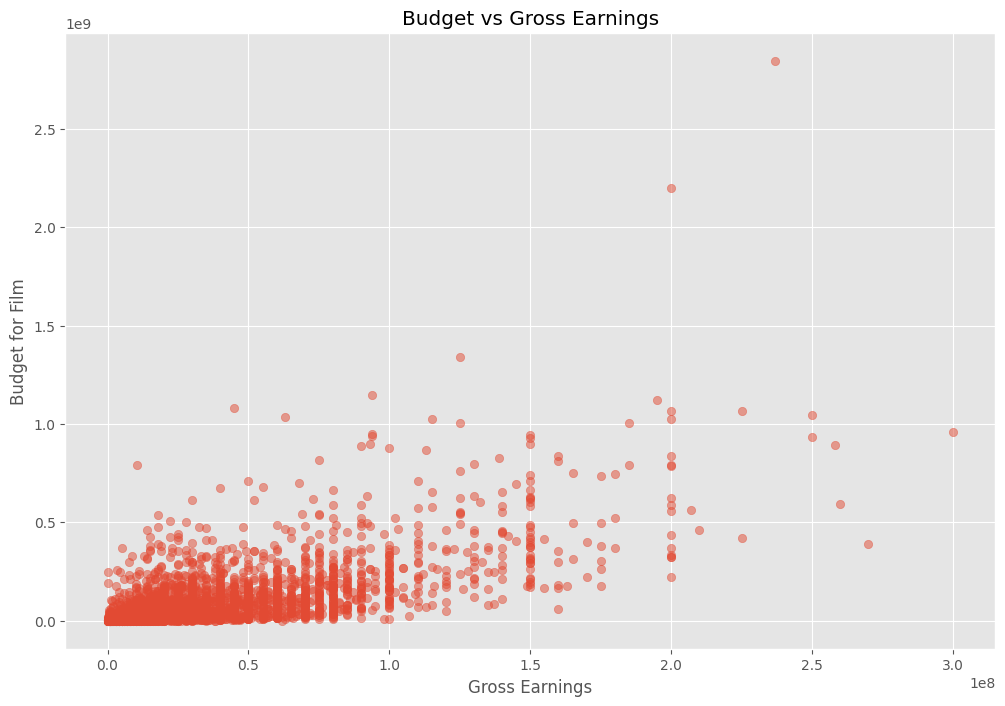

In [25]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [26]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,The Mechanic,R,Action,2011,"January 28, 2011 (United States)",6.6,154000.0,Simon West,Richard Wenk,Jason Statham,United States,40000000.0,76130093.0,CBS Films,93.0,Janu
5939,Ghost Rider: Spirit of Vengeance,PG-13,Action,2011,"February 17, 2012 (United States)",4.3,113000.0,Mark Neveldine,Scott M. Gimple,Nicolas Cage,United States,57000000.0,132563930.0,Columbia Pictures,96.0,Febr
5940,Battle Los Angeles,PG-13,Action,2011,"March 11, 2011 (United States)",5.7,176000.0,Jonathan Liebesman,Christopher Bertolini,Aaron Eckhart,United States,70000000.0,211819354.0,Columbia Pictures,116.0,Marc
5941,The Green Hornet,PG-13,Action,2011,"January 14, 2011 (United States)",5.8,157000.0,Michel Gondry,Seth Rogen,Seth Rogen,United States,120000000.0,227817248.0,Columbia Pictures,119.0,Janu


In [27]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,5141,6,6,1980,1302,8.4,927000.0,2028,3248,829,44,19000000.0,46998772.0,1737,146.0,13
1,4391,6,1,1980,1147,5.8,65000.0,1776,1328,239,45,4500000.0,58853106.0,537,104.0,12
2,4053,4,0,1980,1352,8.7,1200000.0,869,2077,1389,45,18000000.0,538375067.0,1162,124.0,13
3,210,4,4,1980,1147,7.7,221000.0,1014,1633,1805,45,3500000.0,83453539.0,1363,88.0,12
4,776,6,4,1980,1187,7.3,108000.0,822,405,309,45,6000000.0,39846344.0,1338,98.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,4901,6,0,2011,989,6.6,154000.0,2014,2887,907,45,40000000.0,76130093.0,374,93.0,11
5939,1736,5,0,2011,731,4.3,113000.0,1399,3138,1597,45,57000000.0,132563930.0,537,96.0,10
5940,470,5,0,2011,1505,5.7,176000.0,1166,567,5,45,70000000.0,211819354.0,537,116.0,14
5941,4670,5,0,2011,889,5.8,157000.0,1527,3168,1925,45,120000000.0,227817248.0,537,119.0,11


In [28]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.012195,0.010584,0.012730,0.006331,0.028795,0.018443,0.002401,0.008253,0.008875,-0.007158,0.030306,0.017406,0.011305,0.020103,0.006241
rating,-0.012195,1.000000,0.096759,0.042797,0.026292,-0.002328,0.018262,0.031917,0.007080,0.012529,0.070768,-0.169132,-0.113346,-0.045733,0.091315,0.023152
genre,0.010584,0.096759,1.000000,-0.066917,0.029021,0.059227,-0.115283,-0.025971,-0.004239,-0.003413,-0.045116,-0.310840,-0.205989,-0.068894,-0.015217,0.028343
year,0.012730,0.042797,-0.066917,1.000000,0.007823,0.084589,0.260473,0.003999,0.009538,-0.017570,-0.054468,0.376762,0.261487,0.061350,0.089183,0.007550
released,0.006331,0.026292,0.029021,0.007823,1.000000,0.043167,0.007895,0.009044,-0.002913,0.010040,-0.022167,0.008370,0.000980,-0.009653,-0.004696,0.993457
score,0.028795,-0.002328,0.059227,0.084589,0.043167,1.000000,0.400588,0.018305,0.020202,0.016819,-0.139692,0.033539,0.178154,-0.010747,0.396637,0.041460
votes,0.018443,0.018262,-0.115283,0.260473,0.007895,0.400588,1.000000,0.011279,0.015554,-0.011198,0.058558,0.401472,0.646680,0.121041,0.280809,0.009598
director,0.002401,0.031917,-0.025971,0.003999,0.009044,0.018305,0.011279,1.000000,0.276571,0.045738,0.024433,0.009017,0.009257,0.004476,0.025123,0.009978
writer,0.008253,0.007080,-0.004239,0.009538,-0.002913,0.020202,0.015554,0.276571,1.000000,0.036134,0.033161,-0.005748,0.008374,0.015806,0.001122,-0.003767
star,0.008875,0.012529,-0.003413,-0.017570,0.010040,0.016819,-0.011198,0.045738,0.036134,1.000000,-0.010726,-0.004040,0.010134,0.007044,0.018673,0.009587


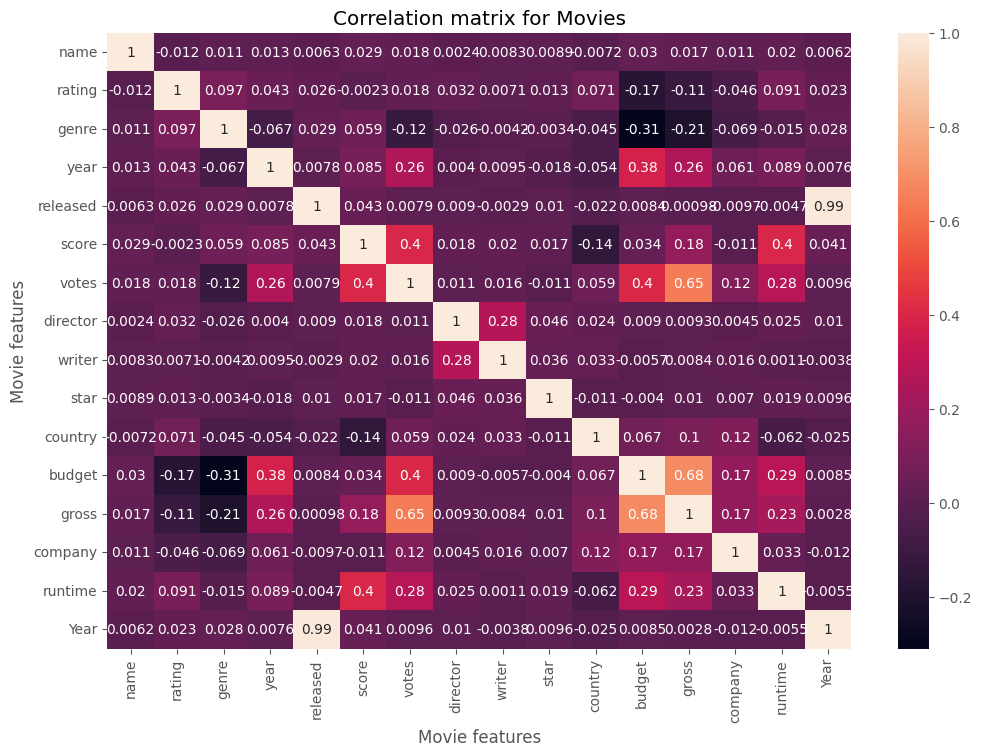

In [29]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()
